# Predicting heart disease using machine learning

This notebook aims to predict whether  a patient suffers from heart disease taking 14 attributes to determine the presence of heart disease.

**Approach: 6 Step Machine Learning Modelling Framework**

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/ml101-6-step-ml-framework.png?raw=1" width=500/>



**Detailed Steps**:
1. Exploring the data
2. Turn strings into categories
4. Check Format-types
5. Fill in missing numerical-values
6. Fill in missing categorical-values
7. Pick Classifiers of interest
8. Split the data
9. Define evaluation metrics
10. Fit Base-ML-models
11. Evaluate Base-ML-models
12. Hyperparameter tuning using RSCV (n=100; n=250, n = len(data))
13. Evaluate .best_params_ of RSCV
14. Hyperparameter tuning using GSCV (n=100; n=250, n = len(data))
15. Evaluate .best_params_ of GSCV
16. Make Predictions
17. Feature Engineering
18. Feature Scaling

### 1. Problem Definition

> Given clinical parameters about a patient, can we predict whether he has heart disease or not?

____________________


### 2. Data

The data origins from the Cleveland UCI Machine Learning Depository and can be found on Kaggle as well: https://www.kaggle.com/ronitf/heart-disease-uci/?select=heart.csv

____________________


### 3. Evaluation

> If we spend 2 weeks with this ML-algorithm, what number should we target?

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

> If we achieve this target number, we pursuing this ML-algorithm and deploy it in production

___________________

### 4. Features

This is where you'll get different information about each of the features in the dataset. You can do this doing your own research or talking to a subject matter expert

**Create Data-Dictionary (14 attributes)**

- **age**: age in years
- **sex**: (1 = male; 0 = female)
- **cp**: chest pain type
    - 1: typical angina 
    - 2: atypical angina 
    - 3: non-anginal pain 
    - 4: asymptomatic
- **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: serum cholestoral in mg/dl
- **fbs**: (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
- **restecg**: resting electrocardiographic results
- **thalach**: maximum heart rate achieved
- **exang**: exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: the slope of the peak exercise ST segment
- **ca**: number of major vessels (0-3) colored by flourosopy
- **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
- **target**: 1 = heart disease; or 0 = no heart disease

# 1. Data

In [1]:
# Import required tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import ML-tools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# import evaluation tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data

In [2]:
# Import heart disease dataset
df_disease = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Zero_To_Master_Python/01_Data_Science_ML_Bootcamp/03_Projects/01_Heart_Disease_Classification/heart.csv.xls")

# 1) Data Exploration (EDA)

**Goal**: Become a subject matter expert
- compare each columns to each other
- compare columns to the target column

**Checklist:**
1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What features contain missing values and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?

### Look at the data

In [3]:
#look at the data
df_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# look at target values
df_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

We have here a balanced problem

In [5]:
df_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Histograms (non-binary)

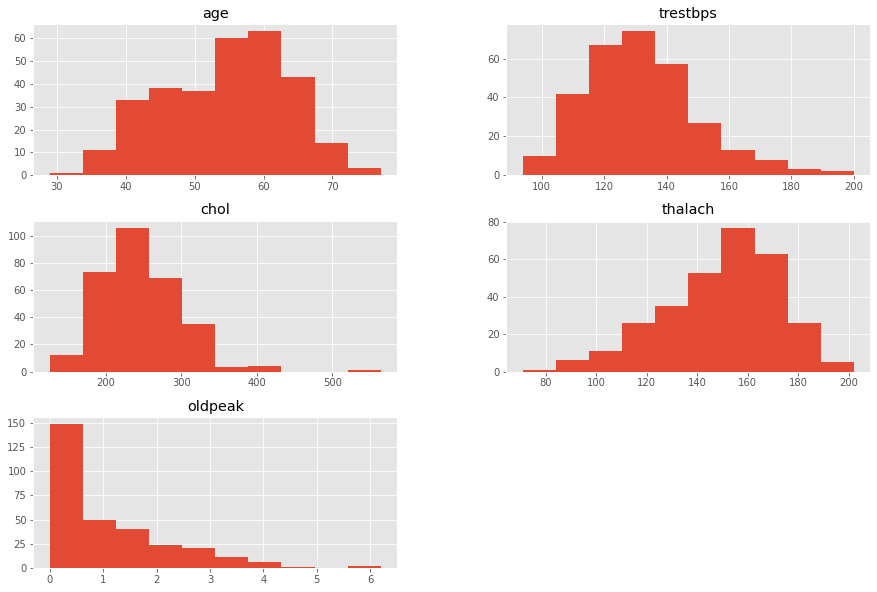

In [8]:
#Create Histograms using features that are non-binary
plt.style.use("ggplot")
df_disease[["age", "trestbps", "chol", "thalach", "oldpeak"]].hist(bins = 10, figsize = (15, 10));


### Feature Correlation Plots (non-binary)

**Pairplots**

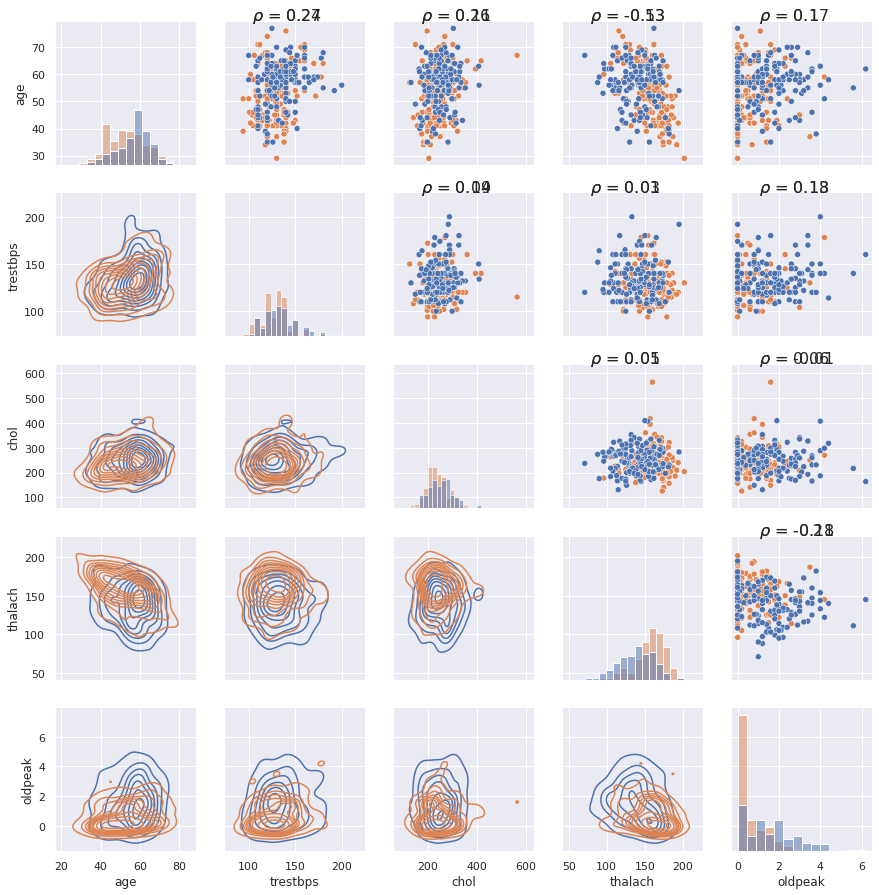

In [9]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 1.01), size = 16, xycoords = ax.transAxes)

# Setup figure layout
import seaborn as sns
sns.set(color_codes = True)

# Create grid and define plot types
grid = sns.PairGrid(data = df_disease, vars = ["age", "trestbps", "chol", "thalach", "oldpeak"], hue = "target")
grid = grid.map_upper(sns.scatterplot)
grid = grid.map_upper(corr)
grid = grid.map_diag(sns.histplot)
grid = grid.map_lower(sns.kdeplot)
plt.subplots_adjust(wspace = 0.2, hspace = 0.2);

**Age ~ trestbps colored by target**

**trestbps**: resting blood pressure

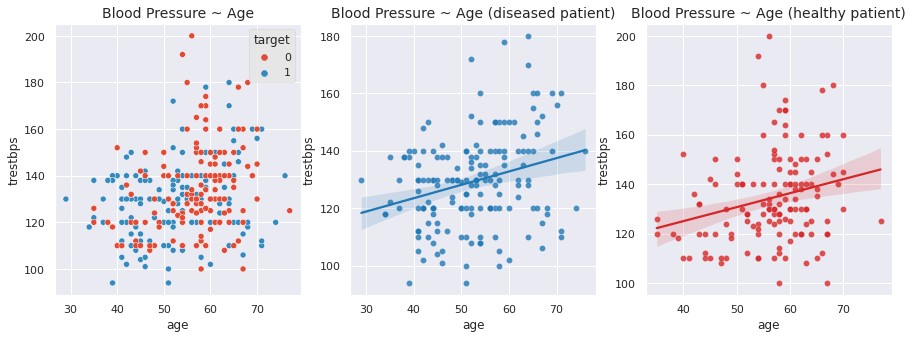

In [10]:
# Subset data based on target value 
df_dis = df_disease[df_disease["target"] == 1]
df_nodis = df_disease[df_disease["target"] == 0]

# Setup figure layout
import seaborn as sns
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
plt.style.use("ggplot")
plt.subplots_adjust(wspace = 0.2)

# Plot desired plots
fig = sns.scatterplot(data = df_disease, x = "age", y = "trestbps", hue = "target", ax = ax[0])
fig = sns.regplot(data = df_dis, x = "age", y = "trestbps", ax = ax[1], color = "tab:blue", 
                  scatter_kws = {"edgecolors": "white", "linewidths": 0.2})
fig = sns.regplot(data = df_nodis, x = "age", y = "trestbps", ax = ax[2], color = "tab:red", 
                  scatter_kws = {"edgecolors": "white", "linewidths": 0.2})

# Add description
ax[0].set_title("Blood Pressure ~ Age", size = 14)
ax[1].set_title("Blood Pressure ~ Age (diseased patient)", size = 14)
ax[2].set_title("Blood Pressure ~ Age (healthy patient)", size = 14);

In [11]:
print(f"The mean of trestbps feature for diseased patients is: {np.round(np.mean(df_dis.trestbps))}\n")
print(f"The mean of trestbps feature for healthy patients is: {np.round(np.mean(df_nodis.trestbps))}\n")

The mean of trestbps feature for diseased patients is: 129.0

The mean of trestbps feature for healthy patients is: 134.0



> The resting blood pressure obviously is not significantly greater for diseased people. Therefore we might conclude to say

- It seems that most patients are above 50; from those that are younger than 50 years most patients suffer heart disease
- Let's check how many people there are below 50 years and above 50 years including their respective target status (1= heart disease; 0 = no heart disease)

In [12]:
# Subset dataframe based on age
age_under50 = df_disease[df_disease["age"] < 50]
age_above50 = df_disease[df_disease["age"] >= 50]

print(f"Data of patients older than 50\n {age_above50.head(3)}\n\n")
print(f"Data of patients younger than 50\n {age_under50.head(3)}")

Data of patients older than 50
    age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[3 rows x 14 columns]


Data of patients younger than 50
    age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
7   44    1   1       120   263    0  ...      0      0.0      2   0     3       1

[3 rows x 14 columns]


In [13]:
under50_dis = age_under50.loc[age_under50["target"] == 1]
under50_nodis = len(age_under50) - len(under50_dis)

print(f"{np.round(len(under50_dis)/len(age_under50)*100)} % of patients younger than 50 suffer from heart disease")

len(under50_dis), len(age_under50)

70.0 % of patients younger than 50 suffer from heart disease


(62, 88)

In [14]:
above50_dis = age_above50.loc[age_above50["target"] == 1]
above50_nodis = len(age_above50) - len(above50_dis)

print(f"{np.round((len(above50_dis)/len(age_above50))*100)}% of patients older than 50 suffer from heart disease\n")

48.0% of patients older than 50 suffer from heart disease



**Age ~ chol colored by target**
- **chol:** serum cholestoral in mg/dl 

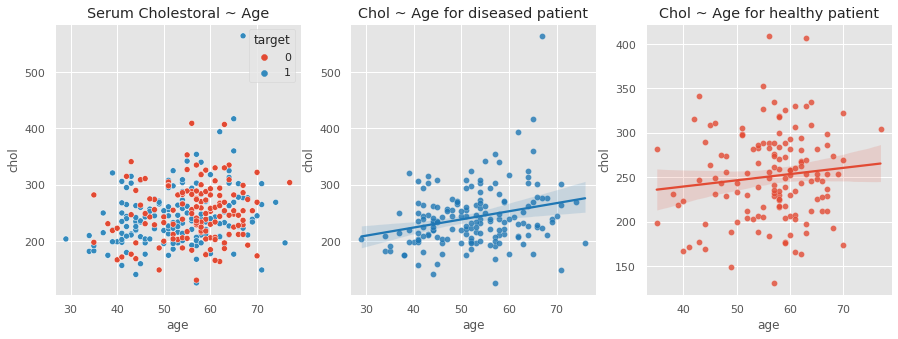

In [15]:
# Setup figure layout
import seaborn as sns
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
plt.style.use("ggplot")
plt.subplots_adjust(wspace = 0.2)

# Plot desired plots
fig = sns.scatterplot(data = df_disease, x = "age", y = "chol", hue = "target", ax = ax[0])
fig = sns.regplot(data = df_dis, x = "age", y = "chol", ax = ax[1], color = "tab:blue", 
                  scatter_kws = {"edgecolors": "white", "linewidths": 0.2})
fig = sns.regplot(data = df_nodis, x = "age", y = "chol", ax = ax[2], 
                  scatter_kws = {"edgecolors": "white", "linewidths": 0.2})

# Add description
ax[0].set_title("Serum Cholestoral ~ Age")
ax[1].set_title("Chol ~ Age for diseased patient")
ax[2].set_title("Chol ~ Age for healthy patient");

> The degree / amount of serum cholestoral does not make any difference in terms of greater risks suffering heart disease. However, we can observe a positive correlation: The older the patient is, the greater the degree of serum cholestoral.

**Age ~ thalach colored by target**

-  **thalach**: maximum heart rate achieved

In [16]:
df_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


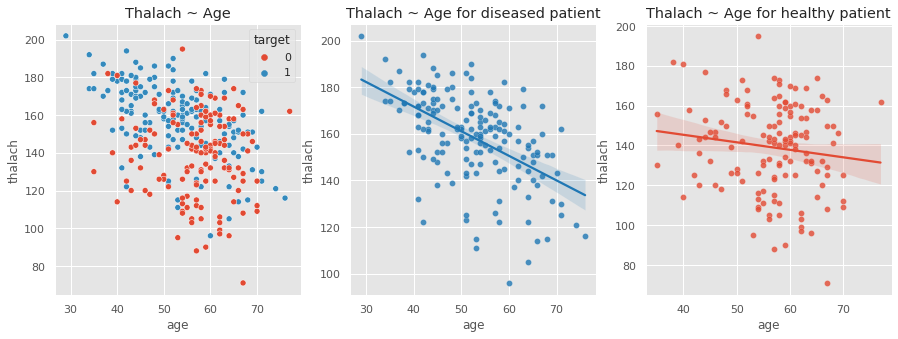

In [17]:
# Setup figure layout
import seaborn as sns
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
plt.style.use("ggplot")
plt.subplots_adjust(wspace = 0.2)

# Plot desired plots
fig = sns.scatterplot(data = df_disease, x = "age", y = "thalach", hue = "target", ax = ax[0])
fig = sns.regplot(data = df_dis, x = "age", y = "thalach", ax = ax[1], color = "tab:blue", 
                  scatter_kws = {"edgecolors": "white", "linewidths": 0.2})
fig = sns.regplot(data = df_nodis, x = "age", y = "thalach", ax = ax[2], 
                  scatter_kws = {"edgecolors": "white", "linewidths": 0.2})

# Add description
ax[0].set_title("Thalach ~ Age")
ax[1].set_title("Thalach ~ Age for diseased patient")
ax[2].set_title("Thalach ~ Age for healthy patient");

In [18]:
print(f"The mean of thalach feature for diseased patients is: {np.round(np.mean(df_dis.thalach))}\n")
print(f"The mean of thalach feature for healthy patients is: {np.round(np.mean(df_nodis.thalach))}\n")


The mean of thalach feature for diseased patients is: 158.0

The mean of thalach feature for healthy patients is: 139.0



> In general, diseased patients have on average a higher maximum heart rate than healthy patients. This observation is detached from their respective ages

### Assessing Binary / Multiclass Features

In [19]:
df_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


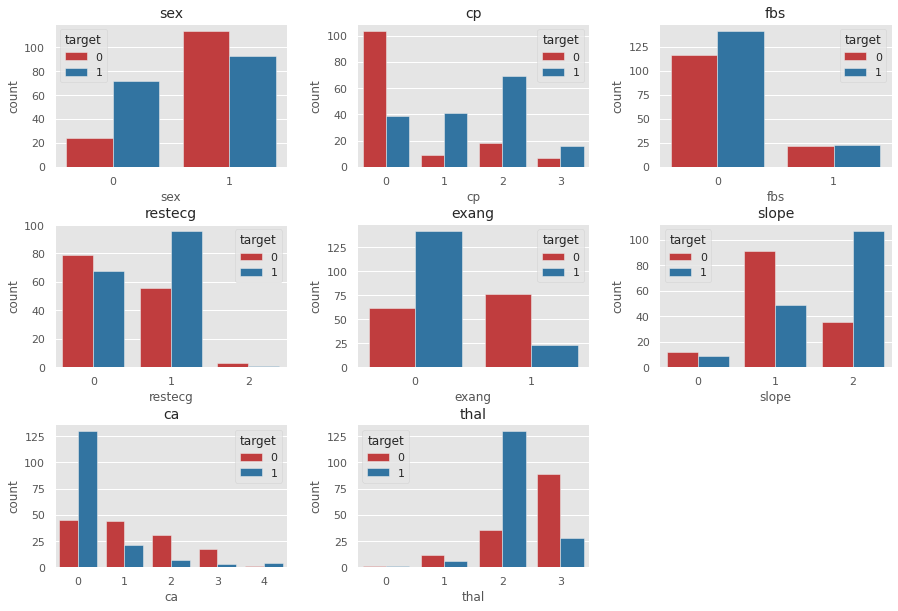

In [20]:
# Define binary features
binary_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Create Count-Plot
plt.figure(figsize=(15, 10))
for i, var in enumerate(binary_features):
    plt.subplot(3, 3, i+1)
    plt.title(var, fontsize = 14)
    plt.xlabel(var, fontsize = 12)
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data = df_disease, x = var, hue = "target", palette = ["tab:red", "tab:blue"])

Alternatively, we might you pd.crosstab to obtain numbers for each binary/multiclass feature.

Let's get the required explanation for each of the binary features:
-  **cp**: chest pain type 
    - Value 1: typical angina 
    - Value 2: atypical angina 
    - Value 3: non-anginal pain 
    - Value 4: asymptomatic 

- **fbs**: fasting blood sugar > 120 mg/dl -> 1 = true; 0 = false

-  **restecg**: resting electrocardiographic results 
    - Value 0: normal 
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

- **exang**: exercise induced angina (1 = yes; 0 = no) 

- **slope**: the slope of the peak exercise ST segment 
    - Value 1: upsloping 
    - Value 2: flat 
    - Value 3: downsloping 

- **ca**: number of major vessels (0-3) colored by flourosopy 

- **thal**:3 = normal; 6 = fixed defect; 7 = reversable defect

### Correlation Heatmap

In [21]:
corr_matrix = df_disease.corr()
corr_matrix.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239


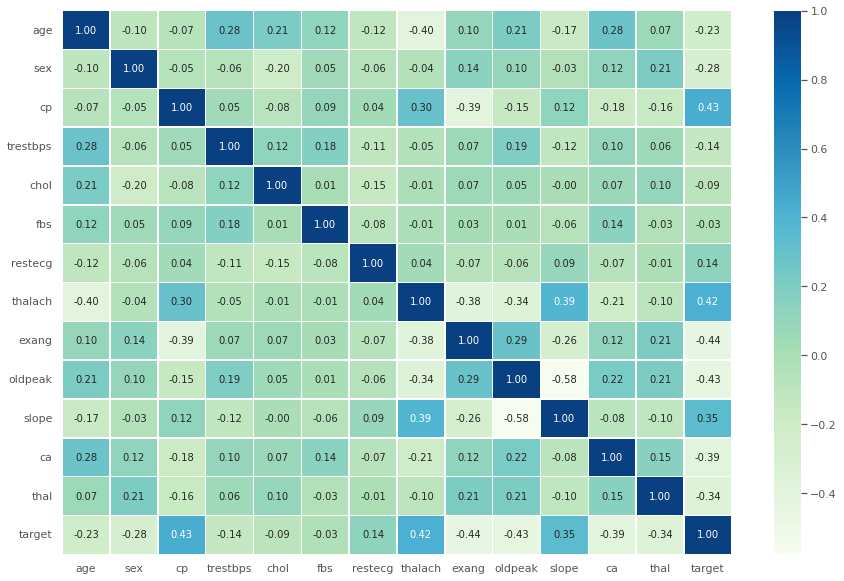

In [22]:
plt.figure(figsize = (15,10))

sns.heatmap(data = corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f", cmap = "GnBu");

# 2) Data Preprocessing

- Impute missing data
- Turn Strings into Categories
- Fill Missing Numerical Data
- Fill Missing Categorical Data

### Check for missing values

In [23]:
df_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
# Verify how many values are missed for each column
df_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
len(df_disease)

303

Considering all three check methods, we could not find any column containing any missing values. 

Therefore we do not need to impute any numerical or categorical values.

Moreover, we do not need to format any columns, since all 14 features are numeric or categorical. Detailed format information can be found using `.info()`

# 3) Setup Modelling


- Split into X and y
- Create Train and Test split

### Split the data

In [26]:
df_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
X = df_disease.drop("target", axis = 1)

y = df_disease["target"]

In [28]:
X.shape, y.shape

((303, 13), (303,))

**Create Train and Test splits**

In [29]:
# Import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Evaluation metrics

We'll look at the following:
- Hyperparameter Tuning
- Feature importance
- Confusion Matrix
- Cross-validation
- Precision
- Recall
- F1 Score
- Classification Report
- ROC Curve
- Area under the Curve (AUC)

In [31]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 4) Base Modelling

We decide which models to use based on the sklearn algorithm map. If we look at the [Scikit-Learn algorithm cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we can see we're working on a classification problem and these are the algorithms it suggests (plus a few more).

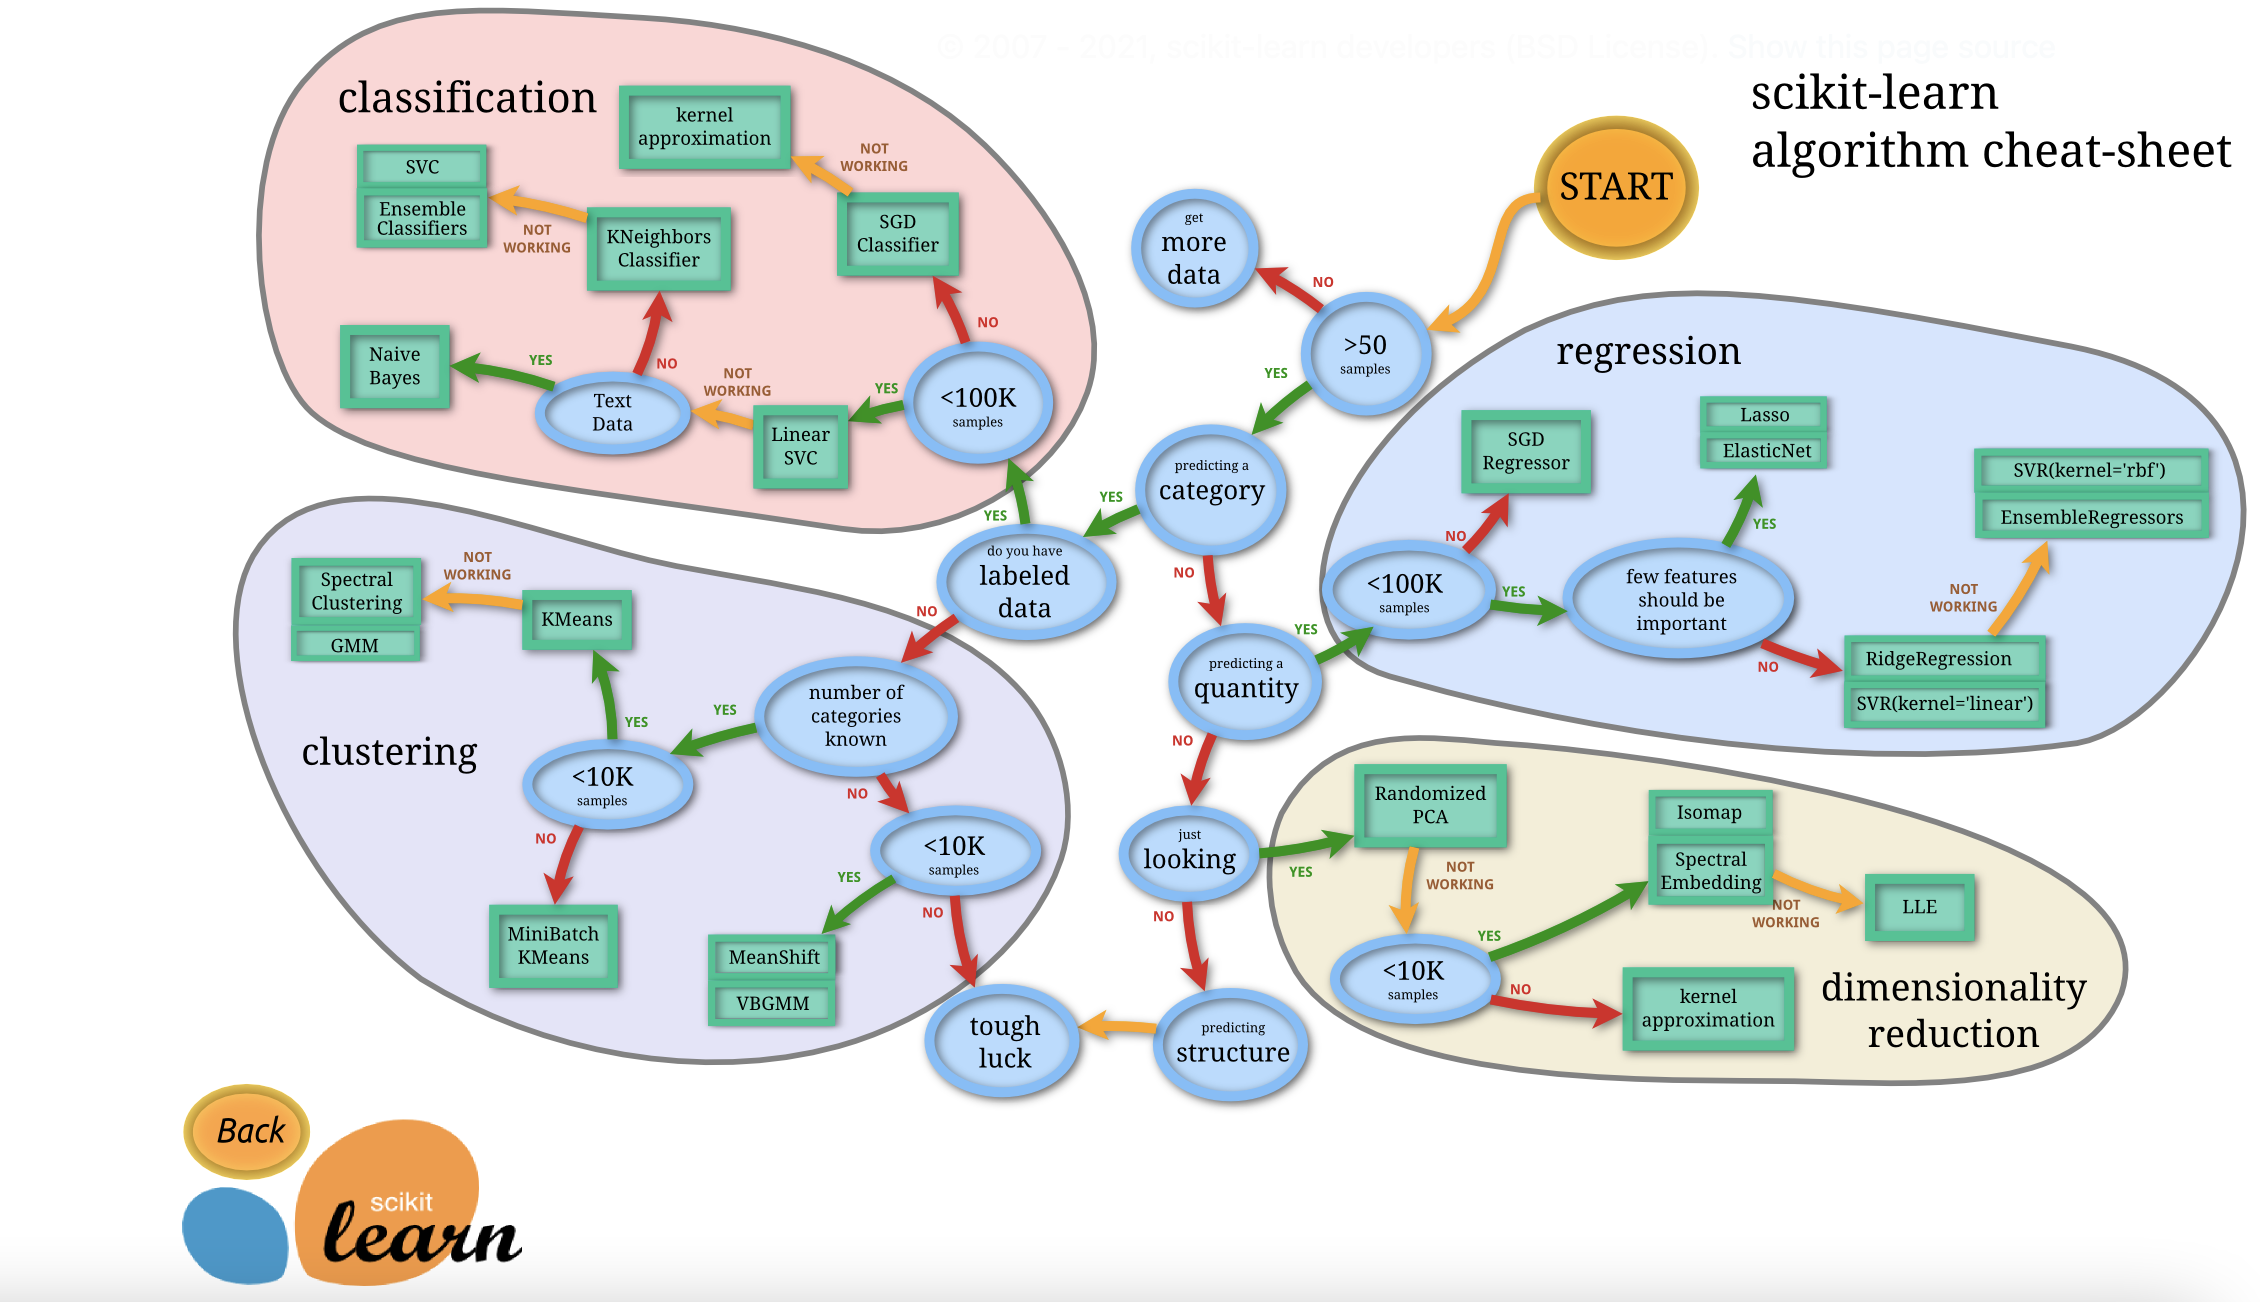

We aim to try out 4 different classifiers:
- [K-Nearest-Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [SVM-Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [RandomForest-Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) as the Ensemble Classifier 
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (is not on the map, but its algorithm is robust and much used by the industry (e.g. Google's most used algorithm for classification problems)

In [32]:
# Import the 4 Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [33]:
y_train.shape

(242,)

In [35]:
# Apply all classifiers

classifiers = [LogisticRegression(), KNeighborsClassifier(), SVC(kernel = "rbf", C = 1000, gamma = 0.0001), RandomForestClassifier()]
np.random.seed = 45
for classifier in classifiers:
  
  model = classifier.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  acc = accuracy_score(y_pred, y_test)
  recall = recall_score(y_pred, y_test)
  precision = precision_score(y_pred, y_test)
  f1 = f1_score(y_pred, y_test)

  print(f"The algorithm {classifier} scores as follows:\nAccuracy = {np.round(acc, 3)}\nRecall = {np.round(recall, 3)}\nPrecision = {np.round(precision, 3)}\nF1-Score = {np.round(f1, 3)}\n\n")



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The algorithm LogisticRegression() scores as follows:
Accuracy = 0.803
Recall = 0.737
Precision = 0.933
F1-Score = 0.824


The algorithm KNeighborsClassifier() scores as follows:
Accuracy = 0.623
Recall = 0.585
Precision = 0.8
F1-Score = 0.676


The algorithm SVC(C=1000, gamma=0.0001) scores as follows:
Accuracy = 0.705
Recall = 0.658
Precision = 0.833
F1-Score = 0.735


The algorithm RandomForestClassifier() scores as follows:
Accuracy = 0.803
Recall = 0.765
Precision = 0.867
F1-Score = 0.812




Before we get into hyperparameter tuning, we set up a function that takes a classifier (including the respective optimal hyperparameters), X_train, X_test, y_train, y_test, and computes various metrics for the training and test dataset.

In [36]:
def fit_score(classifier, X_train, y_train, X_test, y_test):
  """
  The function aims to fit a classifier and evaluate it based on defined metrics
  """

  # Fit the model to the training set
  model = classifier
  model.fit(X_train, y_train)
  
  # Make Predictions
  y_train_preds = model.predict(X_train)
  y_test_preds = model.predict(X_test)

  # Evaluate classifier
  clf_scores = {"Test-Accuracy:": np.round(accuracy_score(y_test_preds, y_test), 3),
                "Test-Recall:": np.round(recall_score(y_test_preds, y_test), 3),
                "Test-Precision": np.round(precision_score(y_test_preds, y_test), 3),
                "Test-F1": np.round(f1_score(y_test_preds, y_test), 3)}

  return clf_scores

### Explanation of Metrics

**Accuracy**:

**Recall**: True-Positive-Rate or TP / (TP+FN)

**Precision**: Accuracy of the positive predictions or TP / (TP + FP)

**F1-Score**:


In [37]:
# Test function
fit_score(RandomForestClassifier(), X_train, y_train, X_test, y_test)

{'Test-Accuracy:': 0.803,
 'Test-F1': 0.818,
 'Test-Precision': 0.9,
 'Test-Recall:': 0.75}

# 5.1) Experiments: RandomForestClassifier

Once we found how RandomForest-Classifiers perform, we try to optimize the algorithm performance by tuning the hyperparameters.

**Hyperparameters:**

- **`n_estimators`**: The number of trees in the forest.
- **`criterion`**: The function to measure the quality of a split
- **`max_depth`** The maximum depth of the tree.
- **`min_samples_split`** The minimum number of samples required to split an internal node
- **`min_samples_leaf`** The minimum number of samples required to be at a leaf node
- **`max_features`** The number of features to consider when looking for the best split
- **`max_samples`** If bootstrap is True, the number of samples to draw from X to train each base estimator.


**GridSearchCV**:
We can either manually adjust hyperparameters or try to use some systematic search functions provided by sklearn. However, GridSearchCV is the better choice. An exhaustive grid search takes in as many hyperparameters as you would like, and tries every single possible combination of the hyperparameters as well as as many cross-validations as you would like it to perform.


**Baseline RF-Classifier**:

This baseline represents the best score without any tuning using the default hyperparameters.

In [38]:
classifier = RandomForestClassifier()

fit_score(classifier, X_train, y_train, X_test, y_test)

{'Test-Accuracy:': 0.82,
 'Test-F1': 0.831,
 'Test-Precision': 0.9,
 'Test-Recall:': 0.771}

**RandomizedSearchCV**: 
RandomizedSearchCV is a non exhaustive search method for finding optimal hyperparameters. This method comes in handy before applying the GridSearchCV. In RandomizedSearchCV, we try out various hyperparameters that are diversified in sampled way.

In [59]:
from sklearn.model_selection import RandomizedSearchCV

# Set random seed from reproducibility
np.random.seed = 42

# Instantiate RF-Classifier
rf = RandomForestClassifier()

# Set up values for parameters of interest
param_grid = {"n_estimators": np.arange(10, 300, 40),
              "max_depth": [None, 2, 4, 6, 8, 10, 12, 14],
              "min_samples_split": np.arange(2, 20, 2),
              "min_samples_leaf": np.arange(1, 20, 2),
              "max_features": [0.5, 1, "auto", "sqrt"]}

# Setup RandomizedSearchCV
rf_rscv = RandomizedSearchCV(estimator = rf, 
                             param_distributions = param_grid,
                             n_iter = 100,
                             n_jobs = -1,
                             random_state = 42, 
                             scoring = "accuracy")

# Fit RandomizedSearch-Classifier
rf_clf_search = rf_rscv.fit(X_train, y_train)

In [60]:
# View best parameters evaluated by RandomizedSearchCV
rf_clf_search.best_params_

{'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'n_estimators': 50}

In [61]:
# Best model
best_rf_rscv = RandomForestClassifier(max_depth=None,
                                 max_features = 1,
                                 min_samples_leaf = 1,
                                 min_samples_split = 14,
                                 n_estimators = 50,
                                 random_state = 21)
# Compute Evaluation metrics
fit_score(best_rf_rscv, X_train, y_train, X_test, y_test)

{'Test-Accuracy:': 0.803,
 'Test-F1': 0.824,
 'Test-Precision': 0.933,
 'Test-Recall:': 0.737}

**GridSearchCV**

In [62]:
from sklearn.model_selection import GridSearchCV

# Instantiate RF-Classifier
rf = RandomForestClassifier(random_state = 11)

# Set up values for parameters of interest
param_grid = {"n_estimators": np.arange(80, 280, 40),
              "max_depth": [None, 4, 6, 8, 10, 12, 14],
              "min_samples_split": np.arange(10, 20, 2),
              "min_samples_leaf": np.arange(1, 10, 2),
              "max_features": [0.5, 1, "sqrt"]}

# Setup RandomizedSearchCV
rf_gscv = GridSearchCV(estimator = rf, 
                       param_grid = param_grid,
                       cv = 5,
                       n_jobs = -1)
                       

# Fit RandomizedSearch-Classifier
rf_clf_gsearch = rf_gscv.fit(X_train, y_train)

# Find best parameters evaluated by the GridSearchCV
rf_clf_gsearch.best_params_

{'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 18,
 'n_estimators': 120}

In [ ]:
rf_clf_gsearch.best_params_

In [47]:
best_rf_gscv = RandomForestClassifier(max_depth = 10,
                                      max_features = 1,
                                      min_samples_leaf = 3,
                                      min_samples_split = 10,
                                      n_estimators = 200,
                                      random_state = 5)


fit_score(best_rf_gscv, X_train, y_train, X_test, y_test)

{'Test-Accuracy:': 0.803,
 'Test-F1': 0.824,
 'Test-Precision': 0.933,
 'Test-Recall:': 0.737}

Test-Accuracy of the GSCV-RF-model is 90.2%.

We improved the test accuracy for the randomforests classifier by 3.3% based on the accuracy of the RSCV-model which was 86.9%.

In [ ]:
# Create best_rscv_ypreds and best_gscv_ypreds
best_rscv_ypreds = best_rf_rscv.predict(X_test)
best_gscv_ypreds = best_rf_gscv.predict(X_test)


**Confusion Matrix: RSCV vs. GSCV**

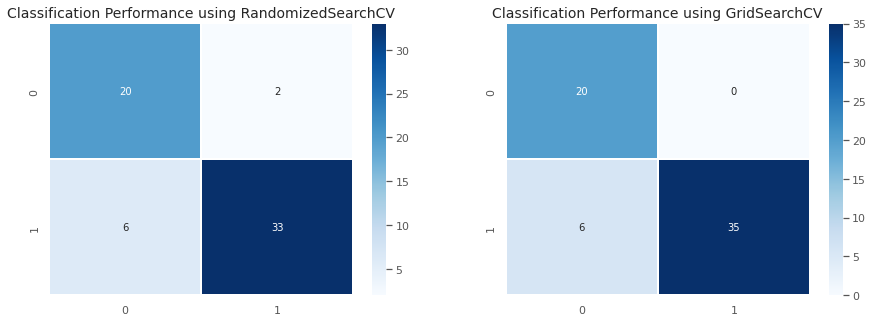

In [ ]:
# Import necessary packages
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make confusion matrices
rscv_matrix = confusion_matrix(best_rscv_ypreds, y_test)
gscv_matrix = confusion_matrix(best_gscv_ypreds, y_test)
 
# Setup figure layout
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
# Plot Confusion Matrix after RSCV and GSCV are applied
sns.heatmap(rscv_matrix, annot = True, cbar = True, cmap = "Blues", linewidths = 1, ax = ax[0])
sns.heatmap(gscv_matrix, annot = True, cbar = True, cmap = "Blues", linewidths = 1, ax = ax[1])
# Add Annotations
ax[0].set_title("Classification Performance using RandomizedSearchCV", fontsize = 14)
ax[1].set_title("Classification Performance using GridSearchCV", fontsize = 14);


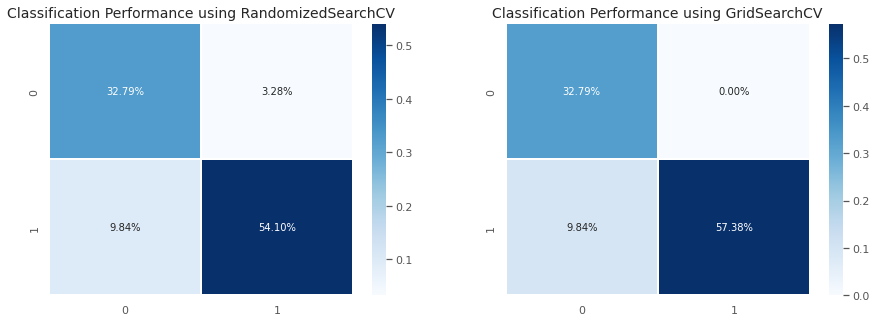

In [ ]:
# Setup figure layout
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
# Plot Confusion Matrix after RSCV and GSCV are applied
sns.heatmap(rscv_matrix/np.sum(rscv_matrix), annot = True, fmt='.2%', cbar = True, cmap = "Blues", linewidths = 1, ax = ax[0])
sns.heatmap(gscv_matrix/np.sum(gscv_matrix), annot = True, fmt='.2%', cbar = True, cmap = "Blues", linewidths = 1, ax = ax[1])
# Add Annotations
ax[0].set_title("Classification Performance using RandomizedSearchCV", fontsize = 14)
ax[1].set_title("Classification Performance using GridSearchCV", fontsize = 14);

# 5.2) Experiments: SVM-Classifier

The **advantages of support vector machines** are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. 

SVMs decision function (detailed in the Mathematical formulation) depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes **`support_vectors_`**, **`support_`** and **`n_support_`**

**Hyperparameters:**
- **`kernel`** parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane.

- **`gamma`** is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set.

- **`C`** is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.





**RandomizedSearchCV**

In [ ]:
# Instantiate SVC and RSCV
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

svc_clf = SVC()

params = {"C": [0.1, 1, 10, 100, 1000],
          "kernel": ["linear", "rbf", "poly"],
          "gamma": [0.1, 0.5, 1, 10, 100, 1000]}

svc_rscv = RandomizedSearchCV(estimator = svc_clf,
                   param_distributions = params,
                   n_iter = 30,
                   random_state = 42, 
                   cv = 5)

svc_rscv.fit(X_train, y_train)

svc_rscv.best_params_

**Assess Metrics using best_params from RSCV**

In [ ]:
best_svc_rscv = SVC(kernel = ,
                    C = ,
                    gamma = )

fit_score(best_svc_rscv, X_train, y_train, X_test, y_test)

# 5.3) Experiments: Logistic-Regression

**I'll tune the LogisticRegression using the following Hyperparameters and Tuning Techniques:**
- penalty:
- C:
- solver: 


In [ ]:
# Instantiate LogisticRegression
log_clf = LogisticRegression()

# Create a param grid
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

# Create RandomizedSearchCV
log_rscv = RandomizedSearchCV(estimator = log_clf,
                              param_distributions = params,
                              n_iter = 16,
                              cv = 5,
                              n_jobs = -1,
                              random_state = 42)

# Fit model to training data
log_rscv.fit(X_train, y_train)

# Save best estimator
best_log_rscv = log_rscv.best_estimator_

In [ ]:
log_rscv.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [ ]:
# Evaluate scores
fit_score(best_log_rscv, X_train, y_train, X_test, y_test)

{'Test-Accuracy:': 0.803,
 'Test-F1': 0.829,
 'Test-Precision': 0.879,
 'Test-Recall:': 0.784}

RandomizedSearchCV does not provide better results compared to tuned RandomForestClassifier. Therefore to "dig deeper", I'll apply an exhaustive parameter search called GridSearch.



In [ ]:
# Instantiate LogisticRegression
log_clf = LogisticRegression()

# Set seed
np.random.seed(42)
# Create a param grid
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

# Create RandomizedSearchCV
log_gscv = GridSearchCV(estimator = log_clf,
                              param_grid = params,
                              cv = 5,
                              n_jobs = -1)

# Fit model to training data
log_gscv.fit(X_train, y_train)

# Save best estimator
best_log_gscv = log_rscv.best_estimator_

In [ ]:
log_gscv.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [ ]:
fit_score(best_log_gscv, X_train, y_train, X_test, y_test)

{'Test-Accuracy:': 0.803,
 'Test-F1': 0.829,
 'Test-Precision': 0.879,
 'Test-Recall:': 0.784}

## Bonus: XGBoost

**Hyperparameters:**

- **`max_depth`**: The maximum depth per tree. A deeper tree might increase the performance, but also the complexity and chances to overfit. The value must be an integer greater than 0. Default is 6.
- **`learning_rate`**: The learning rate determines the step size at each iteration while your model optimizes toward its objective. A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate. But it optimizes the chances to reach the best optimum. The value must be between 0 and 1. Default is 0.3.

- **`n_estimators`**: The number of trees in our ensemble. Equivalent to the number of boosting rounds. The value must be an integer greater than 0. Default is 100.
NB: In the standard library, this is referred as num_boost_round.

- **`colsample_bytree`**: Represents the fraction of columns to be randomly sampled for each tree. It might improve overfitting.
The value must be between 0 and 1. Default is 1.

- **`subsample`**: Represents the fraction of observations to be sampled for each tree. A lower values prevent overfitting but might lead to under-fitting.
The value must be between 0 and 1. Default is 1.

**Regularization parameters:**

- **alpha (`reg_alpha`)**: L1 regularization on the weights (Lasso Regression). When working with a large number of features, it might improve speed performances. It can be any integer. Default is 0.

- **lambda (`reg_lambda`)**: L2 regularization on the weights (Ridge Regression). It might help to reduce overfitting. It can be any integer. Default is 1.

- **`gamma`**: Gamma is a pseudo-regularisation parameter (Lagrangian multiplier), and depends on the other parameters. The higher Gamma is, the higher the regularization. It can be any integer. Default is 0.


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_train.shape, X.shape, y.shape

((242, 13), (242,), (61, 13), (242,), (303, 13), (303,))

In [ ]:
# Instantiate XGBoost-Classifier
xgb_clf = XGBClassifier(objective = "binary:logistic", booster = "gbtree", metrics = "auc", seed = 42)

# Train XGBoost-Classifier
xgb_clf.fit(X_train, y_train)

# Make predictions on Test-set
y_preds = xgb_clf.predict(X_test)

# Evaluation
print(f"Accuracy of XGBoost-Basemodel: {np.round(accuracy_score(y_test, y_preds), 5)*100}%")
print(f"Root Mean Squared Error of XGBoost-Basemodel: {np.round(np.sqrt(mean_squared_error(y_test, y_preds)), 3)}")

Accuracy of XGBoost-Basemodel: 78.689%
Root Mean Squared Error of XGBoost-Basemodel: 0.462


**Implement RandomizedSearchCV**

In [ ]:
# Transform datasets
X, y = df_disease[df_disease.columns.tolist()[:-1]], df_disease[df_disease.columns.tolist()[-1]]


param_dist = {"n_estimators": np.arange(100, 1000, 100),
              "max_depth": np.arange(2, 20, 2),
              "learning_rate": [0.001, 0.01, 0.1, 1],
              "subsample": [0.6, 0.8, 1],
              "colsample_bytree": [0.5, 0.7, 1],
              "gamma": [1, 10 , 100]}


xgb_rscv = RandomizedSearchCV(estimator = xgb_clf, param_distributions = param_dist, 
                              n_iter = 100,
                              scoring = "accuracy",
                              n_jobs = -1)

xgb_rscv.fit(X, y)


print("Best parameters:", xgb_rscv.best_params_)


Best parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 14, 'learning_rate': 0.1, 'gamma': 10, 'colsample_bytree': 0.7}


In [ ]:
best_xgb_rscv = XGBClassifier(objective = "binary:logistic",
                              booster = "gbtree",
                              metrics = "auccuracy",
                              n_estimators = 100,
                              max_depth = 14,
                              learning_rate = 0.1,
                              gamma = 10,
                              subsample = 0.8,
                              colsample_bytree = 0.7,
                              seed = 42)

best_xgb_rscv.fit(X_train, y_train, eval_metric = "aucpr", early_stopping_rounds=10, eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.826144
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.817045
[2]	validation_0-aucpr:0.898183
[3]	validation_0-aucpr:0.89886
[4]	validation_0-aucpr:0.889585
[5]	validation_0-aucpr:0.904895
[6]	validation_0-aucpr:0.929947
[7]	validation_0-aucpr:0.929665
[8]	validation_0-aucpr:0.941286
[9]	validation_0-aucpr:0.947461
[10]	validation_0-aucpr:0.941626
[11]	validation_0-aucpr:0.944138
[12]	validation_0-aucpr:0.946294
[13]	validation_0-aucpr:0.943321
[14]	validation_0-aucpr:0.941202
[15]	validation_0-aucpr:0.935114
[16]	validation_0-aucpr:0.935114
[17]	validation_0-aucpr:0.93752
[18]	validation_0-aucpr:0.940228
[19]	validation_0-aucpr:0.940228
Stopping. Best iteration:
[9]	validation_0-aucpr:0.947461



XGBClassifier(colsample_bytree=0.7, gamma=10, max_depth=14, metrics='auccuracy',
              n_estimators=1000, seed=42, subsample=0.8)

This code prints the results of each tree. We finally stop after building 19 rees. This means that the previous ten trees did not improve the classification. This means that we only build 9 trees for our model.


In [ ]:
# Make predictions on Test-set
y_preds_rscv = best_early_stop_rscv.predict(X_test)

# Evaluation
print(f"Accuracy of XGBoost-Basemodel: {np.round(accuracy_score(y_test, y_preds_rscv), 5)*100}%")
print(f"Root Mean Squared Error of XGBoost-Basemodel: {np.round(np.sqrt(mean_squared_error(y_test, y_preds_rscv)), 3)}")


In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Best Model after early_stopping_rounds
best_early_stop_rscv = XGBClassifier(objective = "binary:logistic",
                              booster = "gbtree",
                              metrics = "auccuracy",
                              n_estimators = 9,
                              max_depth = 14,
                              learning_rate = 0.1,
                              gamma = 10,
                              subsample = 0.8,
                              colsample_bytree = 0.7,
                              seed = 42)

# Fit the model
best_early_stop_rscv.fit(X_train, y_train)

# Make predictions on unseen data
y_preds_early_rscv = best_early_stop_rscv.predict(X_test)

# Evaluation
print(f"Accuracy of XGBoost-Basemodel: {np.round(accuracy_score(y_test, y_preds_rscv), 4)*100}%")
print(f"Root Mean Squared Error of XGBoost-Basemodel: {np.round(np.sqrt(mean_squared_error(y_test, y_preds_rscv)), 3)}")

Accuracy of XGBoost-Basemodel: 78.69%
Root Mean Squared Error of XGBoost-Basemodel: 0.462


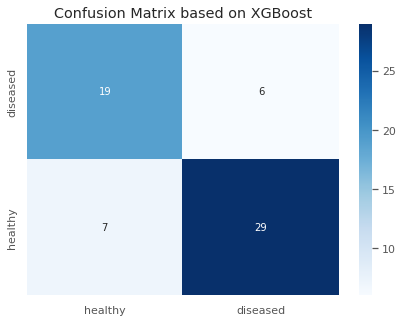

In [ ]:
from sklearn.metrics import confusion_matrix

best_early_rscv_matrix = confusion_matrix(y_preds_early_rscv, y_test)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7, 5))
sns.heatmap(best_early_rscv_matrix, annot = True, fmt = ".2g", cmap = "Blues", 
            xticklabels = ["healthy", "diseased"], yticklabels = ["diseased","healthy"]);
ax.set_title("Confusion Matrix based on XGBoost");

In [ ]:
y_preds_rscv = best_xgb_rscv.predict(X_test)


# Evaluation
print(f"Accuracy of XGBoost-Basemodel: {np.round(accuracy_score(y_test, y_preds_rscv), 5)*100}%")
print(f"Root Mean Squared Error of XGBoost-Basemodel: {np.round(np.sqrt(mean_squared_error(y_test, y_preds_rscv)), 3)}")

Accuracy of XGBoost-Basemodel: 78.689%
Root Mean Squared Error of XGBoost-Basemodel: 0.462


Despite applying RandomizedSearchCV, the XGBoost algorithm does not do a better job in terms of the decision matrix results. Therefore I would suggest to focus on RandomForestClassifier instead.

# 6) Evaluation

In this section we compare the two best models using:
- ROC-Curve
- Confusion Matrix
- Classification Report
- Cross Validation

In [ ]:
# Create best_rscv_ypreds and best_gscv_ypreds for the RandomForestClassifier
best_rscv_ypreds = best_rf_rscv.predict(X_test)
best_gscv_ypreds = best_rf_gscv.predict(X_test)

# Create preds for the LogisticRegression
best_log_rscv_preds = best_log_rscv.predict(X_test)
best_log_gscv_preds = best_log_gscv.predict(X_test)

### ROC-Curve

In [ ]:
from sklearn.metrics import RocCurveDisplay



ax = plt.gca()
rf_gscv_disp = RocCurveDisplay.from_estimator(best_rf_gscv, X_test, y_test, ax = ax, alpha = 0.8)
log_gscv_disp = RocCurveDisplay.from_estimator(best_log_gscv, X_test, y_test, ax = ax, alpha = 0.8)


In [ ]:
best_rf_gscv

### Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Create best_rscv_ypreds and best_gscv_ypreds
best_rscv_ypreds = best_rf_rscv.predict(X_test)
best_gscv_ypreds = best_rf_gscv.predict(X_test)


### Cross-validated Metrics

In [ ]:
from sklearn.metrics import cross_val_score

# Accuracy
rf_acc_cv = cross_val_score(best_rf_gscv, X, y, cv = 5, scoring = "accuracy")
log_acc_cv = cross_val_score(best_log_gscv, X, y, cv = 5, scoring = "accuracy")

rf_acc_cv = np.mean(rf_acc_cv)
log_acc_cv = np.mean(log_acc_cv)

print(f"Cross validated Accuracy for RandomForestClasifier{rf_acc_cv}\n")
print(f"Cross validated Accuracy for LogisticRegression{log_acc_cv}\n\n")


# Precision
rf_prec_cv = cross_val_score(best_rf_gscv, X, y, cv = 5, scoring = "precision")
log_prec_cv = cross_val_score(best_log_gscv, X, y, cv = 5, scoring = "precision")

rf_prec_cv = np.mean(rf_prec_cv)
log_prec_cv = np.mean(log_prec_cv)

print(f"Cross validated Precision for RandomForestClasifier{rf_prec_cv}\n")
print(f"Cross validated Precision for LogisticRegression{log_prec_cv}\n\n")


# Recall
rf_rec_cv = cross_val_score(best_rf_gscv, X, y, cv = 5, scoring = "recall")
log_rec_cv = cross_val_score(best_log_gscv, X, y, cv = 5, scoring = "recall")

rf_rec_cv = np.mean(rf_rec_cv)
log_rec_cv = np.mean(log_rec_cv)

print(f"Cross validated Recall for RandomForestClasifier{rf_rec_cv}\n")
print(f"Cross validated Recall for LogisticRegression{log_rec_cv}\n\n")


# F1-Score
rf_f1_cv = cross_val_score(best_rf_gscv, X, y, cv = 5, scoring = "f1")
log_f1_cv = cross_val_score(best_log_gscv, X, y, cv = 5, scoring = "f1")

rf_f1_cv = np.mean(rf_f1_cv)
log_f1_cv = np.mean(log_f1_cv)

print(f"Cross validated Precision for RandomForestClasifier{rf_f1_cv}\n")
print(f"Cross validated Precision for LogisticRegression{log_f1_cv}\n\n")